## DHIA SALSABILA AZHAR

---



email : dhia.s.a@mail.ugm.ac.id

In [ ]:
!pip install ipython-autotime
%load_ext autotime

time: 2.43 ms (started: 2021-07-13 11:37:05 +00:00)


## Akses Direktori

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
time: 35.2 s (started: 2021-07-13 11:37:19 +00:00)


In [ ]:
train_dir = "/content/drive/MyDrive/rps-cv-images/"

time: 1.41 ms (started: 2021-07-13 11:37:59 +00:00)


## Import Library

In [ ]:
import os
import random
import pathlib
import numpy as np
from shutil import copyfile
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.losses import categorical_crossentropy
from sklearn.metrics import accuracy_score
from keras.optimizers import Adam

time: 2.37 s (started: 2021-07-13 11:38:02 +00:00)


## Visualisasi Data

In [ ]:
Batch_size = 64
num_features = 64
Target_size = (60, 40)

time: 1.17 ms (started: 2021-07-13 11:38:05 +00:00)


In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_dir,
  image_size=Target_size,
  batch_size=Batch_size)

Found 2188 files belonging to 3 classes.
time: 9.94 s (started: 2021-07-13 11:38:07 +00:00)


In [ ]:
data_dir = pathlib.Path(train_dir)
kelas = np.array([item.name for item in sorted(data_dir.glob('*')) if item.name != "LICENSE.txt"])
kelas

array(['paper', 'rock', 'scissors'], dtype='<U8')

time: 11.8 ms (started: 2021-07-13 11:38:17 +00:00)


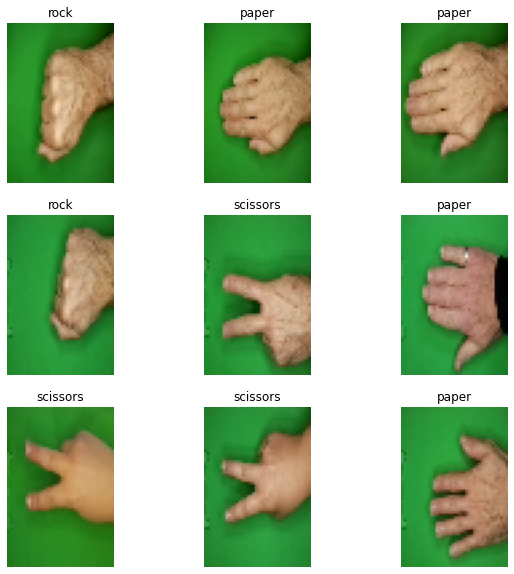

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(kelas[labels[i]])
    plt.axis("off")

## Preprocessing Data

In [ ]:
train_data_gen = ImageDataGenerator(rescale = 1./255,
                                    rotation_range=20,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest',
                                    validation_split=0.2
                                    )


train_gen = train_data_gen.flow_from_directory(train_dir,
                                               batch_size=Batch_size,
                                               shuffle=True,
                                               class_mode='categorical',
                                               target_size= Target_size,
                                               subset='training'
                                               )

val_data_gen = ImageDataGenerator(rescale = 1./255, validation_split=0.2)                                  


val_gen = val_data_gen.flow_from_directory(train_dir,
                                           batch_size=Batch_size,
                                           shuffle=False,
                                           class_mode='categorical',
                                           target_size= Target_size,
                                           subset='validation'
                                           )

Found 1751 images belonging to 3 classes.
Found 437 images belonging to 3 classes.
time: 221 ms (started: 2021-07-13 11:39:58 +00:00)


## Membangun Model CNN

In [ ]:
model = Sequential()

#module
model.add(Conv2D(num_features, kernel_size=(3, 3), input_shape=(60,40, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(num_features, kernel_size=(3, 3),  padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(2*2*num_features, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.55))

model.add(Conv2D(2*2*num_features, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))

#flatten
model.add(Flatten())
model.add(Dropout(0.25))

#dense 
model.add(Dense(2*2*num_features))
model.add(BatchNormalization())
model.add(Activation('relu'))

#output layer
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', 
              optimizer=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7), 
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 58, 38, 64)        1792      
_________________________________________________________________
batch_normalization (BatchNo (None, 58, 38, 64)        256       
_________________________________________________________________
activation (Activation)      (None, 58, 38, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 58, 38, 64)        36928     
_________________________________________________________________
activation_1 (Activation)    (None, 58, 38, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 29, 19, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 19, 256)       1

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience = 10, mode = 'min', restore_best_weights=True)

time: 1.3 ms (started: 2021-07-13 11:40:08 +00:00)


## Training

In [ ]:
history = model.fit(train_gen,
                    epochs = 30,
                    steps_per_epoch=55,
                    validation_data = val_gen,
                    verbose = 1,
                    callbacks = [early_stop],
                    validation_steps=55
                    )

Epoch 1/30
55/55 [==============================] - 390s 6s/step - loss: 0.8255 - accuracy: 0.6604 - val_loss: 1.5227 - val_accuracy: 0.3369
Epoch 2/30
55/55 [==============================] - 24s 439ms/step - loss: 0.1549 - accuracy: 0.9467 - val_loss: 2.5044 - val_accuracy: 0.3369
Epoch 3/30
55/55 [==============================] - 24s 443ms/step - loss: 0.0995 - accuracy: 0.9643 - val_loss: 2.9311 - val_accuracy: 0.3369
Epoch 4/30
55/55 [==============================] - 23s 434ms/step - loss: 0.0769 - accuracy: 0.9735 - val_loss: 3.0424 - val_accuracy: 0.3369
Epoch 5/30
55/55 [==============================] - 24s 435ms/step - loss: 0.0607 - accuracy: 0.9819 - val_loss: 2.9180 - val_accuracy: 0.3369
Epoch 6/30
55/55 [==============================] - 23s 433ms/step - loss: 0.0702 - accuracy: 0.9760 - val_loss: 2.4660 - val_accuracy: 0.3456
Epoch 7/30
55/55 [==============================] - 24s 434ms/step - loss: 0.0572 - accuracy: 0.9801 - val_loss: 2.3045 - val_accuracy: 0.4217
E

## Grafik Loss & Akurasi Train dan Validasi

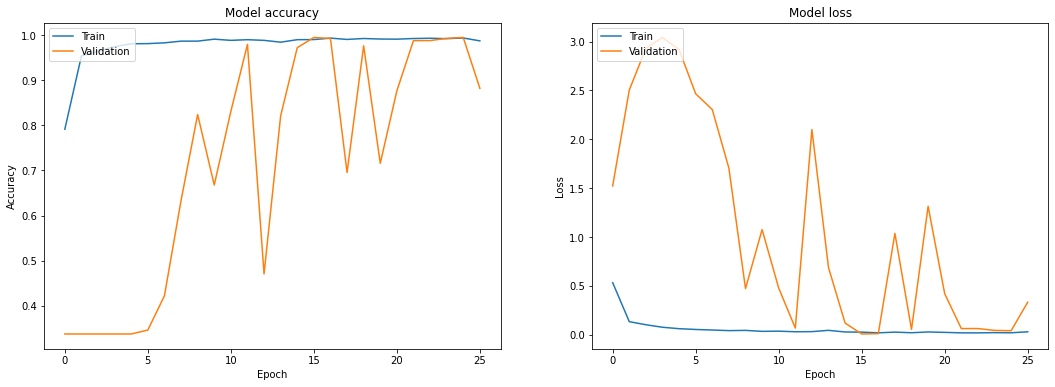

time: 326 ms (started: 2021-07-13 11:57:32 +00:00)


In [ ]:
fig, axes = plt.subplots(1,2, figsize=(18, 6))

# Plot training & validation accuracy values

axes[0].plot(history.history['accuracy'])
axes[0].plot(history.history['val_accuracy'])
axes[0].set_title('Model accuracy')
axes[0].set_ylabel('Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values

axes[1].plot(history.history['loss'])
axes[1].plot(history.history['val_loss'])
axes[1].set_title('Model loss')
axes[1].set_ylabel('Loss')
axes[1].set_xlabel('Epoch')
axes[1].legend(['Train', 'Validation'], loc='upper left')
plt.show()

## Pengujian

(1, 60, 40, 3)


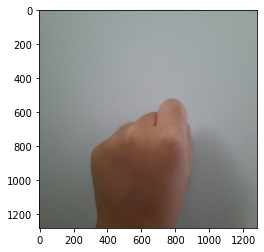

hasil prediksi = rock
time: 2.26 s (started: 2021-07-13 11:57:06 +00:00)


In [ ]:
from PIL import Image
from skimage import transform
import matplotlib.image as mpimg
def load(filename):
   np_image = Image.open(filename)
   np_image = np.array(np_image).astype('float32')/255
   np_image = transform.resize(np_image, (60, 40, 3))
   np_image = np.expand_dims(np_image, axis=0)
   return np_image

pathimg = "jarii.jpg"
img = load(pathimg)
print(img.shape)
prediction = model.predict(img)
hasil = kelas[np.argmax(prediction)]
imgshow = mpimg.imread(pathimg)
plt.imshow(imgshow)
plt.show()
print("hasil prediksi = {}".format(hasil))

In [ ]:
from tensorflow import lite

model.save("model.h5")

time: 121 ms (started: 2021-07-13 12:04:10 +00:00)


In [ ]:
tflite_model = tf.keras.models.load_model('model.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(tflite_model)
tflite_save = converter.convert()
open("generated.tflite", "wb").write(tflite_save)

INFO:tensorflow:Assets written to: /tmp/tmp5z1mi6rc/assets


10455196

time: 3.51 s (started: 2021-07-13 12:03:42 +00:00)
